**1: EXPLORATION OF DATASET**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

**Step1 : Read the file train.csv into Python and print a few rows.**

In [93]:
X_raw = pd.read_csv("train.csv",sep=",", index_col=0)

In [92]:


X_raw = X_raw.drop(['Name', 'Ticket', 'Cabin',"Parch"], axis=1)
X = X_raw.drop('Survived', axis=1)
y = X_raw[['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test

,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,
710,3,male,NaN,1,15.2458,C
440,2,male,31.0,0,10.5000,S
841,3,male,20.0,0,7.9250,S
721,2,female,6.0,0,33.0000,S
40,3,female,14.0,1,11.2417,C
...,...,...,...,...,...,...
434,3,male,17.0,0,7.1250,S
774,3,male,NaN,0,7.2250,C
26,3,female,38.0,1,31.3875,S


In [94]:
X_raw.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [3]:

#correlation = X_train["Embarked"].corr(y_train["Survived"])
#correlation

In [4]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Fare          0
Embarked      2
dtype: int64

**Step2: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

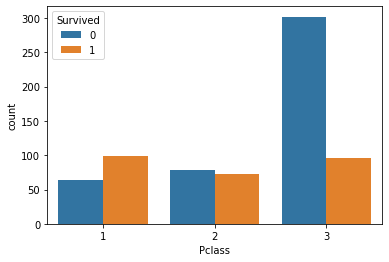

In [5]:
sns.countplot(x=X_train["Pclass"],hue=y_train["Survived"]) #### Nonsurviving passenger are more than survived passenger

**Step3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.**

In [6]:
total_P1=X_train[X_train["Pclass"]==1].count()[0]

survived_P1=X_train[X_train["Pclass"]==1]
survived_P1_shape=survived_P1[y_train["Survived"]==1].shape[0]
proportion=survived_P1_shape/total_P1
proportion

<ipython-input-6-b32bf14000ef>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survived_P1_shape=survived_P1[y_train["Survived"]==1].shape[0]


0.6073619631901841

**Step4: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

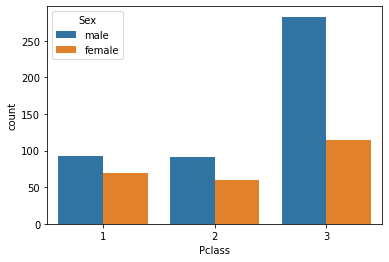

In [7]:
sns.countplot(x=X_train["Pclass"],hue=X_train["Sex"],data=X_train)


**Step5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

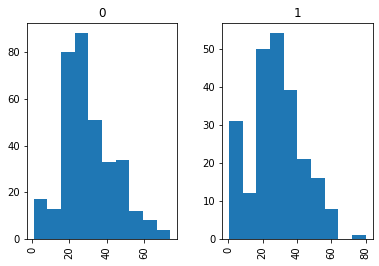

In [8]:
X_train["Age"].hist(y_train["Survived"])

**Step6: Calculate the average age for survived and drowned passengers separately.**

In [9]:
age=X_train["Age"]
survived_mean_ages = age[y_train["Survived"]==1].mean()
survived_mean_ages
drowned_mean_ages = age[y_train["Survived"]==0].mean()
print("survived_mean_ages:",survived_mean_ages)
print("drowned_mean_ages:",drowned_mean_ages)

survived_mean_ages: 28.45189655172414
drowned_mean_ages: 30.21323529411765


**Step7:Replace missing age values by the mean age.**


In [10]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [11]:
#X_train["Age"].fillna(X_train["Age"].mean(),inplace=True)

In [12]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Fare          0
Embarked      2
dtype: int64

**Step8) Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.**

In [13]:
dg=X_train.join(y_train)
dg

,Pclass,Sex,Age,SibSp,Fare,Embarked,Survived
PassengerId,,,,,,,
332,1,male,45.5,0,28.5000,S,0
734,2,male,23.0,0,13.0000,S,0
383,3,male,32.0,0,7.9250,S,0
705,3,male,26.0,1,7.8542,S,0
814,3,female,6.0,4,31.2750,S,0
...,...,...,...,...,...,...,...
107,3,female,21.0,0,7.6500,S,1
271,1,male,NaN,0,31.0000,S,0
861,3,male,41.0,2,14.1083,S,0


In [14]:
dg.groupby(["Pclass","Sex","Survived"])["Survived"].count()



Pclass  Sex     Survived
1       female  0             3
                1            67
        male    0            61
                1            32
2       female  0             2
                1            58
        male    0            76
                1            15
3       female  0            59
                1            56
        male    0           243
                1            40
Name: Survived, dtype: int64

**2: FEATURE ENGINEERING**

#Missing values of the Age Column are replaced by mean of the Age Column value

In [15]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [16]:
X_train.dtypes #The object values should turn into float or integer data types

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Fare        float64
Embarked     object
dtype: object

<AxesSubplot:ylabel='PassengerId'>

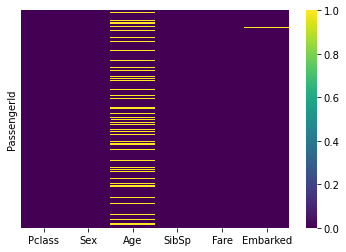

In [17]:
sns.heatmap(X_train.isnull(),yticklabels=False,cmap="viridis")

####String columns(Name) is removed.

#Working on Age Column

In [18]:
#X_train["Age"]=X_train["Age"].astype(int)

<AxesSubplot:xlabel='Age', ylabel='count'>

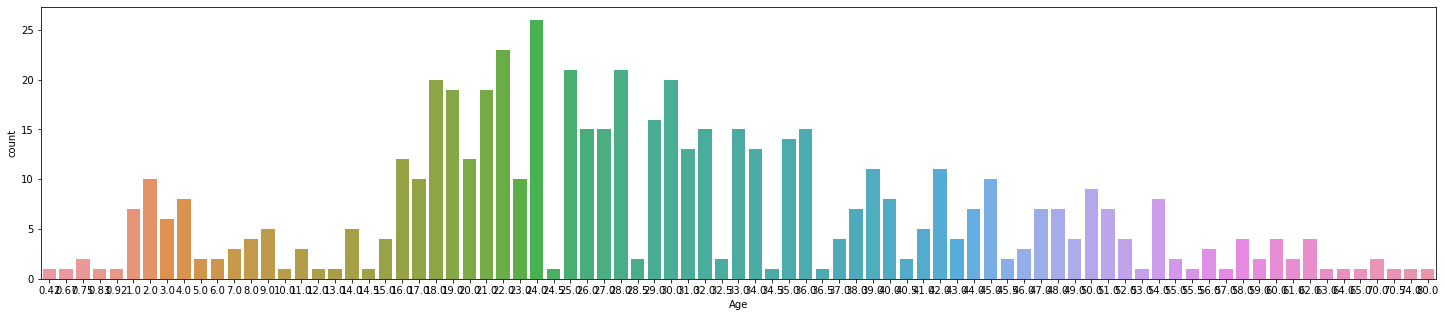

In [19]:
fig=plt.figure(figsize=(25,5))
sns.countplot(x=X_train["Age"],data=X_train)


#Embarked

In [20]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Fare          0
Embarked      2
dtype: int64

**Embarked column will be imputed in Feature Engineering process.**

**<font color='red'>Pipeline</font>**

In [21]:
numerical_columns=["Fare","Pclass"]
categorical_columns=["Embarked","Sex","SibSp"]

In [22]:
categorical_pipeline= Pipeline([
    ("cat_imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_ohe",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first"))

])

bining_pipeline= Pipeline([
    ("cat_imputer",SimpleImputer(strategy="mean")),
    ("cat_ohe",KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))

])

In [23]:
column_transformer=ColumnTransformer([
   ("sex_imputer",categorical_pipeline,categorical_columns),
   ("Age_Imputer",bining_pipeline,["Age"]),
   ("num_scaler",MinMaxScaler(),numerical_columns)
])

In [24]:
column_transformer.fit(X_train)
X_train_fe =column_transformer.transform(X_train)
X_test_fe= column_transformer.transform(X_test)

In [25]:
X_train_fe

array([[0.        , 1.        , 1.        , ..., 1.        , 0.0556283 ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.02537431,
        0.5       ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 1.        , 0.02753757,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.2342244 ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.15085515,
        0.        ]])

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
m = LogisticRegression()

In [28]:
m.fit(X_train_fe, y_train)

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
l=m.score(X_train_fe,y_train)
l

0.8033707865168539

In [30]:
v=m.score(X_test_fe,y_test)
v

0.8044692737430168

<font color='red'>Cross Validation</font>

In [31]:
from sklearn.model_selection import cross_val_score, cross_validate

In [32]:
scores = cross_val_score(m, X_train_fe, y_train, cv=5)
scores.round(3) 

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d arr

array([0.797, 0.79 , 0.775, 0.754, 0.817])

In [33]:
f"Mean cross-validation score: {scores.mean(): 5.3f}"

'Mean cross-validation score:  0.786'

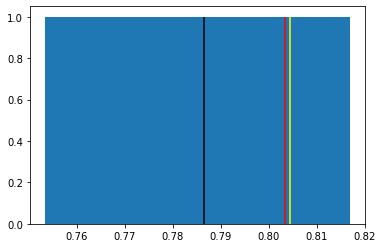

In [34]:
plt.hist(scores, bins=5) #it doesn't add much value for low ks
plt.vlines(scores.mean(),ymin=0,ymax=1, color='black')
plt.vlines(l,ymin=0,ymax=1, color='red') # this is the model score
plt.vlines(v,ymin=0,ymax=1, color='yellow') # this is the test score

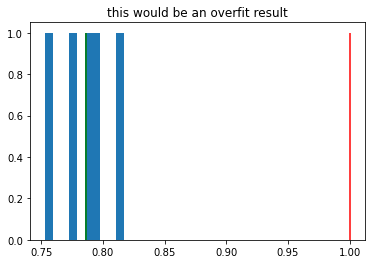

In [35]:
plt.hist(scores, bins=10) #it doesn't add much value for low ks
plt.vlines(scores.mean(),ymin=0,ymax=1, color='green')
plt.title('this would be an overfit result')
plt.vlines(1,ymin=0,ymax=1, color='red')#hypotypical 

In [89]:
from sklearn.utils import resample
from tqdm import tqdm # progress bar
import warnings
warnings.filterwarnings("ignore")

In [90]:
boots = []
split_size = int(len(X_train_fe)*0.75)
for i in tqdm(range(1000)):
    Xb, yb = resample(X_train_fe, y_train) #bootsrapping random resample
    Xb_train = Xb[:split_size] #train data
    yb_train = yb[:split_size]
    Xb_test = Xb[split_size:] # validation data
    yb_test = yb[split_size:]
    m.fit(Xb_train, yb_train) #fit on the train data
    score = m.score(Xb_test, yb_test) # score on the val data
    boots.append(score) # save the score
boots.sort() 
None
# sort scores from best to worst - required for my confidence interval levels

100%|██████████| 1000/1000 [00:07<00:00, 140.80it/s]


In [38]:
a= list(range(1,11))
a[1:-1]

[2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
ci80 = boots[100:-100]
print(f"80% confidence interval: {ci80[0]} -{ci80[-1]}")

80% confidence interval: 0.7640449438202247 -0.8370786516853933


In [40]:
ci90 = boots[50:-50]
print("90% confidence interval: {} - {}".format(ci90[0], ci90[-1]))

90% confidence interval: 0.7471910112359551 - 0.848314606741573


In [41]:
ci99 = boots[5:-5]
print("99% confidence interval: {} - {}".format(ci99[0], ci99[-1]))

99% confidence interval: 0.7191011235955056 - 0.8651685393258427


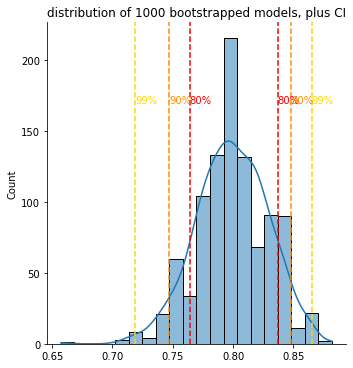

In [42]:
# Plot distribution of bootstrapped models

import seaborn as sns
sns.displot(boots, bins=20, kde=True)
plt.axvline(x=ci80[0], color = 'red', linestyle = '--')
plt.axvline(x=ci80[-1], color = 'red', linestyle = '--')
plt.axvline(x=ci90[0], color = 'darkorange', linestyle = '--')
plt.axvline(x=ci90[-1], color = 'darkorange', linestyle = '--')
plt.axvline(x=ci99[0], color = 'gold', linestyle = '--')
plt.axvline(x=ci99[-1], color = 'gold', linestyle = '--')
plt.text(s = '80%', x=ci80[0], y = 170, color = 'red')
plt.text(s = '90%', x=ci90[0], y = 170, color = 'darkorange')
plt.text(s = '99%', x=ci99[0], y = 170, color = 'gold')
plt.text(s = '80%', x=ci80[-1], y = 170, color = 'red')
plt.text(s = '90%', x=ci90[-1], y = 170, color = 'darkorange')
plt.text(s = '99%', x=ci99[-1], y = 170, color = 'gold')
plt.title('distribution of 1000 bootstrapped models, plus CI')
None

**<font color='red'>Decision Tree</font>**

In [43]:
clf_Decision_Tree = DecisionTreeClassifier(random_state=42)
clf_Decision_Tree.fit(X_train_fe,y_train)
DT_predictions = clf_Decision_Tree.predict(X_train_fe)
round(accuracy_score(y_train,DT_predictions),3)


0.955

In [44]:
DT_predictions_test = clf_Decision_Tree.predict(X_test_fe)
round(accuracy_score(y_test,DT_predictions_test),3)

0.821

In [45]:
scores_dt = cross_val_score(clf_Decision_Tree, X_test_fe, y_test, cv=5)
scores_dt.round(3).mean()

0.7095999999999999

**max_depth=5:**

In [46]:
clf_Decision_Tree = DecisionTreeClassifier(max_depth=5,random_state=42)

In [47]:
clf_Decision_Tree.fit(X_train_fe,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

*Make a predictions*

In [48]:
DT_predictions = clf_Decision_Tree.predict(X_train_fe)

In [49]:
round(accuracy_score(y_train,DT_predictions),3)

0.848

In [50]:
DT_predictions_test = clf_Decision_Tree.predict(X_test_fe)

In [51]:
round(accuracy_score(y_test,DT_predictions_test),3)

0.788

Cross Vlaidation

In [52]:
scores_dt_10 = cross_val_score(clf_Decision_Tree, X_train_fe, y_train, cv=5)
scores_dt_10.round(3).mean() 

0.7891999999999999

In [53]:
scores_dt_10 = cross_val_score(clf_Decision_Tree, X_test_fe, y_test, cv=5)
scores_dt_10.round(3).mean()

0.7041999999999999

**max_depth=4:**

In [54]:
clf_Decision_Tree = DecisionTreeClassifier(max_depth=4,random_state=42)

In [55]:
clf_Decision_Tree.fit(X_train_fe,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [56]:
DT_predictions = clf_Decision_Tree.predict(X_train_fe)

In [57]:
round(accuracy_score(y_train,DT_predictions),3)

0.826

In [58]:
DT_predictions_test=clf_Decision_Tree.predict(X_test_fe)

In [59]:
round(accuracy_score(y_test,DT_predictions_test),3)

0.793

Cross Validation

In [60]:
scores_dt_4= cross_val_score(clf_Decision_Tree, X_train_fe, y_train, cv=5)
scores_dt_4.round(3).mean()

0.7964

In [61]:
scores_dt_4 = cross_val_score(clf_Decision_Tree, X_test_fe, y_test, cv=5)
scores_dt_4.round(3).mean()

0.7207999999999999

**Insight:

1)Since my model performance on the test data decreases, I need  tree prunning process such that the max depth of the tree model is adjusted(5-->4)
2)after this process I got some results.
    a)The performance on the test data increased.
    b)I prevent over fitting.
    c)I lose traning performance but I gained cross validation performance.


In [62]:
X_train

,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,
332,1,male,45.5,0,28.5000,S
734,2,male,23.0,0,13.0000,S
383,3,male,32.0,0,7.9250,S
705,3,male,26.0,1,7.8542,S
814,3,female,6.0,4,31.2750,S
...,...,...,...,...,...,...
107,3,female,21.0,0,7.6500,S
271,1,male,NaN,0,31.0000,S
861,3,male,41.0,2,14.1083,S


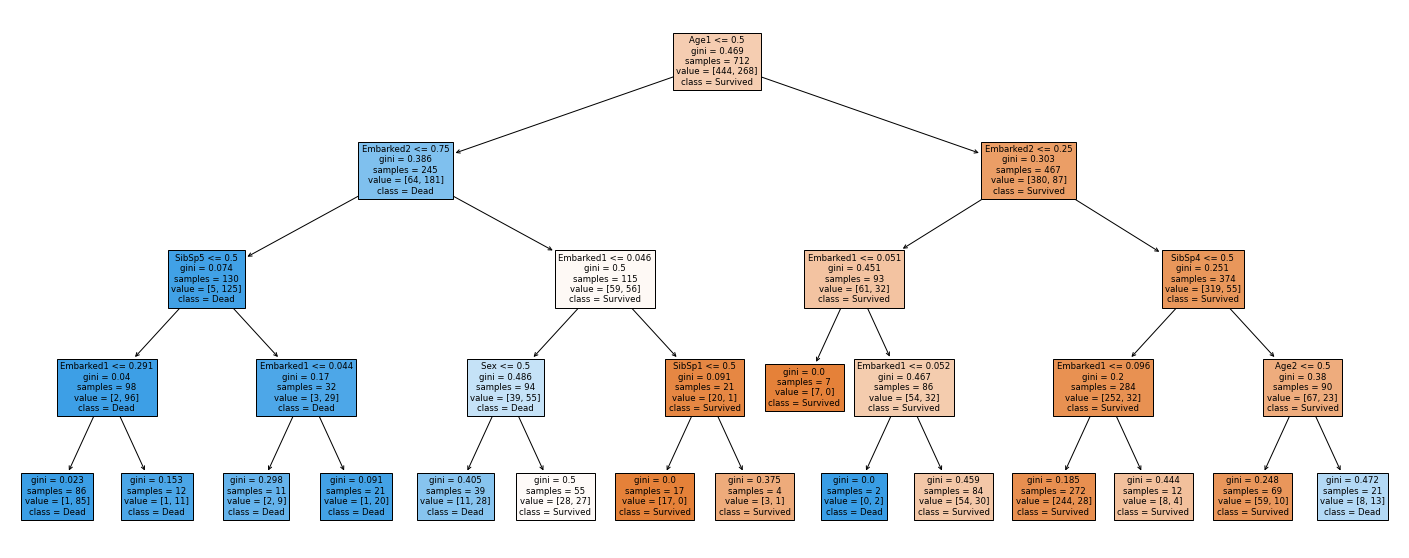

In [63]:
fig=plt.figure(figsize=(25,10))
t = plot_tree(clf_Decision_Tree, feature_names=['Pclass', 'Sex', 'Age1', 'Age2', 'Age3', 'Age4', 'SibSp1', 'SibSp2', 'SibSp3', 'SibSp4', 'SibSp5', 'SibSp6', 'Fare', 'Embarked1','Embarked2'] ,class_names=["Survived","Dead"], filled=True)

In [64]:
X_train.columns.to_list()

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [65]:
y_train.columns.to_list()

['Survived']

<font color='red'>Random Forest</font>

In [66]:
clf_RF=RandomForestClassifier(n_estimators=500,max_depth=4)

In [67]:
clf_RF.fit(X_train_fe,y_train)
print("Accuracy score Random Forest classifier (training set):", round(clf_RF.score(X_train_fe, y_train), 3))
print("Accuracy score Random Forest classifier (test set):", round(clf_RF.score(X_test_fe, y_test), 3))

<ipython-input-67-61b6784e7ba8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(X_train_fe,y_train)


Accuracy score Random Forest classifier (training set): 0.817
Accuracy score Random Forest classifier (test set): 0.799


**Cross Validation**

In [68]:
scores_rf_4 = cross_val_score(clf_RF, X_train_fe, y_train, cv=5)
scores_rf_4.round(3).mean() 

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection

0.7892

In [69]:
scores_rf_4 = cross_val_score(clf_RF, X_test_fe, y_test, cv=5)
scores_rf_4.round(3).mean() 

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection

0.7874

In [70]:
from sklearn.metrics import confusion_matrix
Y_pred=clf_RF.predict(X_test_fe)
confusion_matrix(Y_pred, y_test)

array([[95, 26],
       [10, 48]])

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score,plot_roc_curve
f1_score(Y_pred, y_test)

0.7272727272727273

In [72]:
recall_score(Y_pred, y_test)

0.8275862068965517

In [73]:
precision_score(Y_pred, y_test)

0.6486486486486487

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


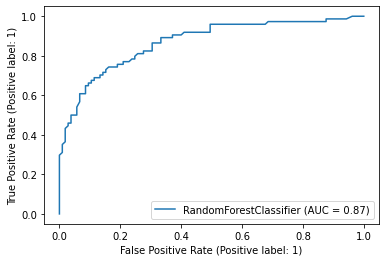

In [74]:
plot_roc_curve(clf_RF, X_test_fe,y_test)

In [75]:
test_raw= pd.read_csv("test.csv", index_col=0)
test_raw = test_raw.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_kaggle= test_raw

X_kaggle




,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [76]:
numerical_columns=["Fare","Pclass"]
categorical_columns=["Embarked","Sex","SibSp"]

In [77]:
categorical_pipeline= Pipeline([
    ("cat_imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_ohe",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first"))

])

bining_pipeline= Pipeline([
    ("cat_imputer",SimpleImputer(strategy="mean")),
    ("cat_ohe",KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))

])

numerical_pipeline= Pipeline([
    ("cat_imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_ohe",MinMaxScaler())

])

In [78]:
column_transformer=ColumnTransformer([
   ("sex_imputer",categorical_pipeline,categorical_columns),
   ("Age_Imputer",bining_pipeline,["Age"]),
   ("num_scaler",numerical_pipeline,numerical_columns)
])

In [79]:
column_transformer.fit(X_kaggle)
X_kaggle_fe =column_transformer.transform(X_kaggle)

In [80]:
X_kaggle.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [81]:
Y_pred_kaggle=clf_RF.predict(X_kaggle_fe)

In [82]:
X_df=X_kaggle.index.to_frame()
X_df

,PassengerId
PassengerId,
892,892
893,893
894,894
895,895
896,896
...,...
1305,1305
1306,1306
1307,1307


In [83]:

X_df.reset_index(drop=True, inplace=True)


In [84]:
Y_pred_kaggle

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [85]:
df_y = pd.DataFrame(
            {'Survived': Y_pred_kaggle,
           }
           )

In [86]:
df_y

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [87]:
X_final=X_df.join(df_y)

X_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [88]:
X_final.to_csv("outzip.csv",index=False)